In [57]:
import cv2
import numpy as np
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc


img = cv2.imread('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0914(a)(licoln from penny).tif',0)
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],np.uint8)

erosion = cv2.erode(img,kernel)

### 邊界抽取演算法
先用B侵蝕A，再算A與A'的差集

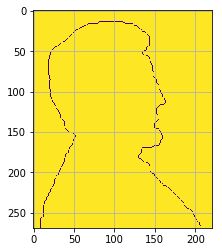

In [58]:
plt.imshow(~(img-erosion))
plt.grid()
plt.show()

### 洞的填充
1. 形成X0

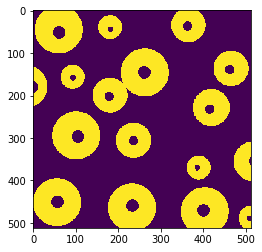

array([[  0, 255,   0],
       [255, 255, 255],
       [  0, 255,   0]], dtype=uint8)

In [59]:
%matplotlib inline
img2 = cv2.imread('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0916(a)(region-filling-reflections).tif',0)
kernel2 = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],np.uint8)
img2[img2>1] = 1
# X0 = np.zeros(img2.shape)
plt.imshow(img2)
plt.show()
255*kernel2

* white point (143,267)
 

uint8


<IPython.core.display.Javascript object>


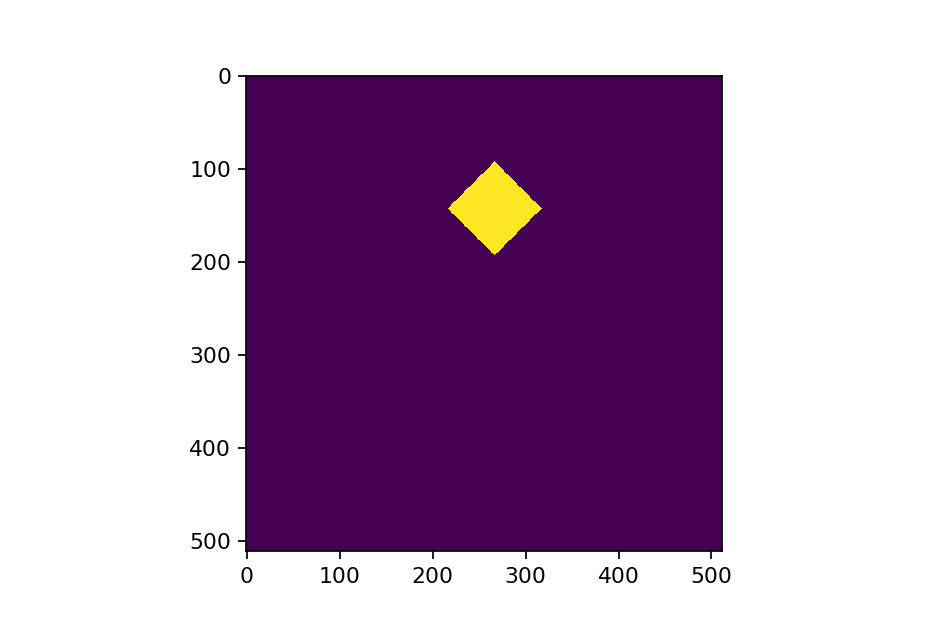

In [69]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
X0 = np.zeros(img2.shape,np.uint8)
X0[143][267] = 1

def recursive(X,B,A):
    dilation = cv2.dilate(X,B)
    A_c = ~A
    A_c[A_c>1]  = 1
    a = 1*np.logical_and(dilation,A_c)
    return a.astype(np.uint8)
print(img2.dtype)
for i in range(50):
    X0 = recursive(X0,kernel2,img2)
plt.imshow(X0)
plt.show()

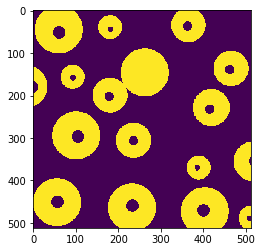

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]], dtype=bool)

In [61]:
%matplotlib inline
pad_im = np.logical_or(img2,X0)
plt.imshow(pad_im)
plt.show()
pad_im

In [62]:
A_c = ~img2

In [63]:
A_c

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254]], dtype=uint8)